C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

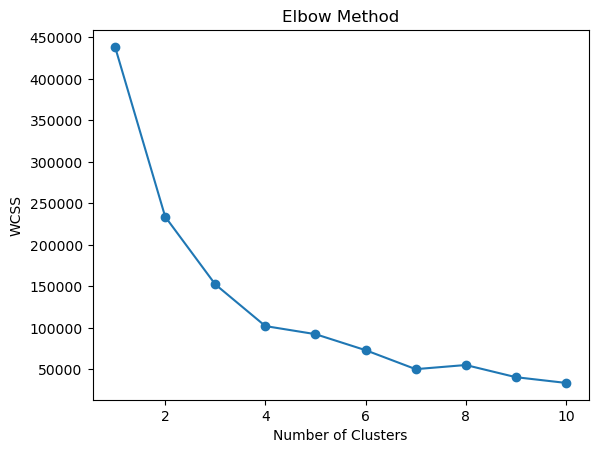

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


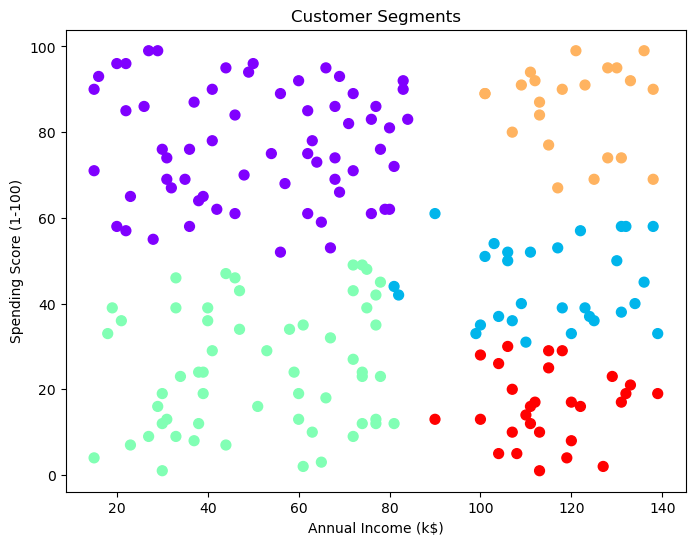

   CustomerID  Gender  Age  AnnualIncome  SpendingScore  Cluster
0           1    Male   49            68             86        0
1           2  Female   56            22             57        0
2           3    Male   66            41             29        2
3           4    Male   69            41             78        0
4           5    Male   49           112             92        3


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/python/mall_customers.csv")

# Select features for clustering (Annual Income & Spending Score)
X = df[["AnnualIncome", "SpendingScore"]]

# Find optimal number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply KMeans with 5 clusters (commonly optimal here)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X["AnnualIncome"], X["SpendingScore"], 
            c=df["Cluster"], cmap="rainbow", s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()

# Show clustered data
print(df.head())
